<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/PolynomialLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [206]:
X = 6*np.random.rand(200,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(200,1)

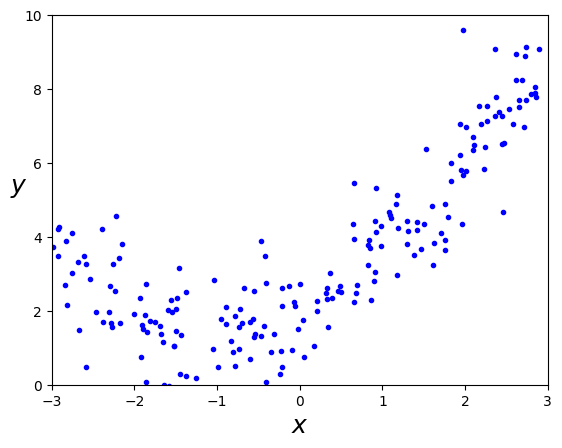

In [207]:
plt.plot(X,y,"b.")
plt.xlabel("$x$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

0.20966158681277014


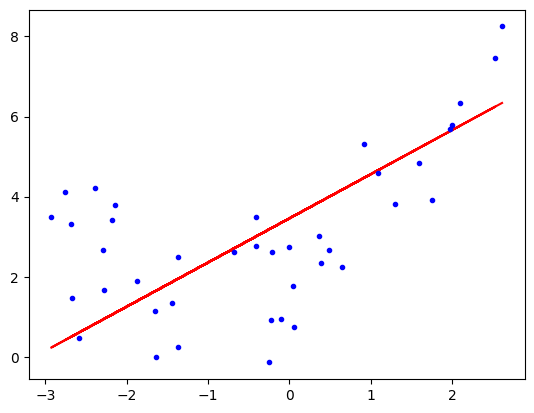

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test,y_pred))
plt.plot(X_test,y_pred,"r-")
plt.plot(X_test,y_test,"b.")
plt.show()

In [209]:
poly = PolynomialFeatures(degree=2,include_bias=False)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)
print(r2_score(y_test,y_pred))
print(lr.coef_,lr.intercept_)

0.7102728120313915
[[0.99683977 0.49772115]] [1.97608675]


In [210]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

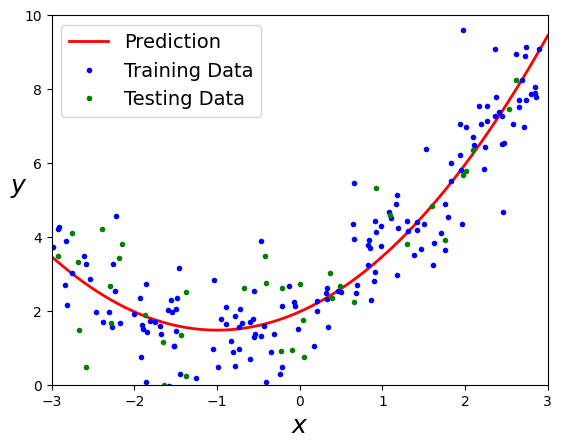

In [211]:
plt.plot(X_new,y_new,"r-",linewidth = 2 , label="Prediction")
plt.plot(X_train,y_train,"b.",label="Training Data")
plt.plot(X_test,y_test,"g.",label="Testing Data")
plt.xlabel("$x$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

In [212]:
def polynomial_regression(degree):
    X_new = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg)
    ])
    polynomial_regression.fit(X_train,y_train)
    ynew_big = polynomial_regression.predict(X_new)
    plt.plot(X_new,ynew_big,'r',label="Degree"+str(degree),linewidth = 2)
    plt.plot(X_train,y_train,"b.",label="Training Data")
    plt.plot(X_test,y_test,"g.",label="Testing Data")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3,3,0,10])
    plt.show()
    # Accuracy
    y_pred = polynomial_regression.predict(X_test)
    print(r2_score(y_test,y_pred))


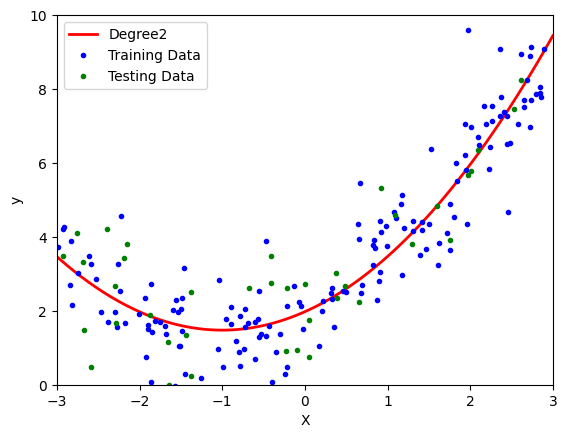

0.7102728120313915


In [213]:
polynomial_regression(degree=2)

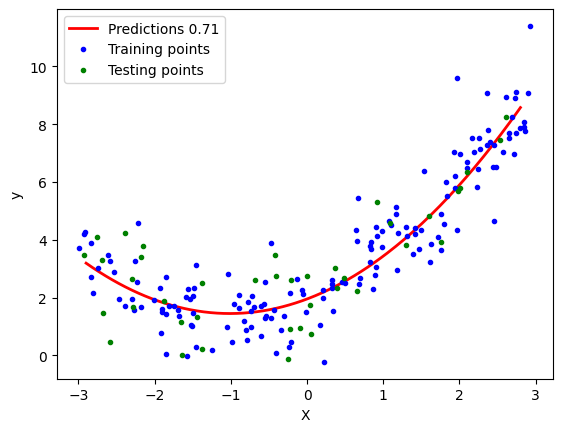

In [214]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [215]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [216]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [217]:

lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [218]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()


X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape


(100, 2)

In [219]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
x = np.linspace(0, 1, 100)
y = np.linspace(1, 2, 100)
X_multi = np.column_stack((x, y))
poly = PolynomialFeatures(degree=3)
poly.fit(X_multi)
X_multi_trans = poly.transform(X_multi)
print("Input features:", poly.n_features_in_)
print("Output features:", poly.n_output_features_)
print("Powers:\n", poly.powers_)


Input features: 2
Output features: 10
Powers:
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [220]:
X_multi_trans

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.01010101e-02, 1.01010101e+00, 1.02030405e-04,
        1.02030405e-02, 1.02030405e+00, 1.03061015e-06, 1.03061015e-04,
        1.03061015e-02, 1.03061015e+00],
       [1.00000000e+00, 2.02020202e-02, 1.02020202e+00, 4.08121620e-04,
        2.06101418e-02, 1.04081216e+00, 8.24488122e-06, 4.16366501e-04,
        2.10265083e-02, 1.06183867e+00],
       [1.00000000e+00, 3.03030303e-02, 1.03030303e+00, 9.18273646e-04,
        3.12213039e-02, 1.06152433e+00, 2.78264741e-05, 9.46100120e-04,
        3.21674041e-02, 1.09369174e+00],
       [1.00000000e+00, 4.04040404e-02, 1.04040404e+00, 1.63248648e-03,
        4.20365269e-02, 1.08244057e+00, 6.59590497e-05, 1.69844553e-03,
        4.37349724e-02, 1.12617554e+00],
       [1.00000000e+00, 5.05050505e-02, 1.05050505e+00, 2.55076013e-03,
   

In [221]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [222]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()
